In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
apr12 = pd.read_csv('04-12-2020.csv', sep=',')
apr12.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,32.3182,-86.9023,3563,93,NaN,3470,1.0,75.988020,21583.0,437.0,2.610160,84000001,USA,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,61.3707,-152.4044,272,8,66.0,264,2.0,45.504049,8038.0,31.0,2.941176,84000002,USA,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,33.7298,-111.4312,3542,115,NaN,3427,4.0,48.662422,42109.0,NaN,3.246753,84000004,USA,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,34.9697,-92.3731,1280,27,367.0,1253,5.0,49.439423,19722.0,130.0,2.109375,84000005,USA,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,36.1162,-119.6816,22795,640,NaN,22155,6.0,58.137726,190328.0,5234.0,2.812020,84000006,USA,485.423868,22.961176


# EDA
- look at statistical distributions for confirmed and mortality rate
    * get quartiles/box-plots, outliers, histogram, etc

In [132]:
apr12.sort_values(by='Mortality_Rate', ascending=False)


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
56,Northern Mariana Islands,US,2020-04-12 23:18:15,15.0979,145.6739,11,2,NaN,9,69.0,19.947773,38.0,NaN,18.181818,580,MNP,68.910489,NaN
25,Michigan,US,2020-04-12 23:18:15,43.3266,-84.5361,24244,1479,433.0,22765,26.0,304.295367,79437.0,3636.0,6.100478,84000026,USA,997.043023,14.997525
35,New York,US,2020-04-12 23:18:15,42.1657,-74.9481,189033,9385,23887.0,179648,36.0,1121.124012,461601.0,42594.0,4.964742,84000036,USA,2737.680538,22.532574
20,Kentucky,US,2020-04-12 23:18:15,37.6681,-84.6701,1963,97,464.0,1866,21.0,57.342280,24567.0,459.0,4.941416,84000021,USA,717.640244,23.382578
42,Puerto Rico,US,2020-04-12 23:18:15,18.2208,-66.5901,897,44,NaN,853,72.0,30.578767,6716.0,NaN,4.905240,630,PRI,228.948718,NaN
39,Oklahoma,US,2020-04-12 23:18:15,35.5653,-96.9289,1970,96,865.0,1874,40.0,53.859954,22760.0,446.0,4.873096,84000040,USA,622.260182,22.639594
51,Washington,US,2020-04-12 23:18:15,47.4009,-121.4905,10609,506,NaN,10103,53.0,140.527668,93615.0,642.0,4.769535,84000053,USA,1240.031828,6.051466
6,Connecticut,US,2020-04-12 23:18:15,41.5978,-72.7554,12035,554,NaN,11481,9.0,337.560483,41220.0,1654.0,4.603241,84000009,USA,1156.148159,13.743249
17,Indiana,US,2020-04-12 23:18:15,39.8494,-86.2583,7928,343,NaN,7585,18.0,121.149255,42489.0,NaN,4.326438,84000018,USA,649.282380,NaN
26,Minnesota,US,2020-04-12 23:18:15,45.6945,-93.9002,1621,70,842.0,1551,27.0,32.771004,37421.0,361.0,4.318322,84000027,USA,756.522966,22.270204


In [182]:
apr1 = apr12[['Province_State', 
              'Country_Region', 
              'Last_Update', 
              'Confirmed', 
              'Deaths', 
              'Recovered', 
              'Active', 
              'Incident_Rate',
              'Mortality_Rate',
              'People_Tested',
              'Testing_Rate',
              'Hospitalization_Rate']]
#Hospitalization_rate would be important for warning risk phase or not
#Incident_rate = confirmed cases PER 100,000 persons
print(apr1.info())
apr1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        59 non-null     object 
 1   Country_Region        59 non-null     object 
 2   Last_Update           56 non-null     object 
 3   Confirmed             59 non-null     int64  
 4   Deaths                59 non-null     int64  
 5   Recovered             29 non-null     float64
 6   Active                59 non-null     int64  
 7   Incident_Rate         56 non-null     float64
 8   Mortality_Rate        57 non-null     float64
 9   People_Tested         56 non-null     float64
 10  Testing_Rate          56 non-null     float64
 11  Hospitalization_Rate  49 non-null     float64
dtypes: float64(6), int64(3), object(3)
memory usage: 5.7+ KB
None


,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,People_Tested,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-12 23:18:15,3563,93,NaN,3470,75.988020,2.610160,21583.0,460.300152,12.264945
1,Alaska,US,2020-04-12 23:18:15,272,8,66.0,264,45.504049,2.941176,8038.0,1344.711576,11.397059
2,Arizona,US,2020-04-12 23:18:15,3542,115,NaN,3427,48.662422,3.246753,42109.0,578.522286,NaN
3,Arkansas,US,2020-04-12 23:18:15,1280,27,367.0,1253,49.439423,2.109375,19722.0,761.753354,10.156250
4,California,US,2020-04-12 23:18:15,22795,640,NaN,22155,58.137726,2.812020,190328.0,485.423868,22.961176


In [169]:
apr2 = pd.read_csv('04-13-2020.csv', sep=',')

count    57.000000
mean      3.177029
std       2.417004
min       0.000000
25%       2.109375
50%       2.812020
75%       3.949224
max      18.181818
Name: Mortality_Rate, dtype: float64


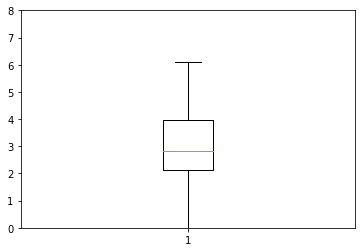

In [149]:
# Box plot on Mortality_Rate; assessing variables
print(apr1['Mortality_Rate'].describe())
mortal_arrange = apr1['Mortality_Rate'].dropna()
plt.boxplot(mortal_arrange)
plt.ylim(0,8)
plt.show()

count      56.000000
mean      132.096557
std       180.366308
min         0.000000
25%        51.592214
50%        71.401808
75%       124.342038
max      1121.124012
Name: Incident_Rate, dtype: float64


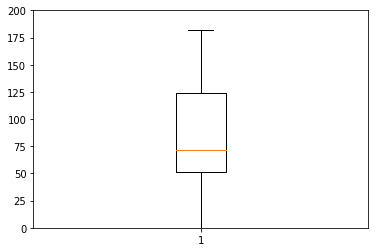

In [153]:
print(apr1['Incident_Rate'].describe())
incidentRate_arrange = apr1['Incident_Rate'].dropna()
plt.boxplot(incidentRate_arrange)
plt.ylim(0,200)
plt.show()

In [160]:
apr1_risky = apr1[(apr1['Mortality_Rate'] > 6.3) | (apr1['Incident_Rate'] > 195)]
risk_states = apr1_risky['Province_State'].values

In [178]:
risk_states2 = apr2[apr2['Province_State'].isin(risk_states)]['Province_State'].values

apr1_risky_vars = apr1[apr1['Province_State'].isin(risk_states)]
apr2_risky_vars = apr2[apr2['Province_State'].isin(risk_states2)]
apr1_risky_vars[['Province_State', 'Confirmed',
                       'Deaths', 'Recovered',
                       'Incident_Rate', 'Mortality_Rate']]


,Province_State,Confirmed,Deaths,Recovered,Incident_Rate,Mortality_Rate
6,Connecticut,12035,554,NaN,337.560483,4.603241
9,District of Columbia,1875,50,493.0,265.675190,2.666667
21,Louisiana,20595,840,NaN,447.983649,4.078660
24,Massachusetts,25475,756,NaN,371.151606,2.967615
25,Michigan,24244,1479,433.0,304.295367,6.100478
33,New Jersey,61850,2350,NaN,696.337277,3.799515
35,New York,189033,9385,23887.0,1121.124012,4.964742
43,Rhode Island,2665,63,35.0,251.566746,2.363977
56,Northern Mariana Islands,11,2,NaN,19.947773,18.181818


In [179]:
apr2_risky_vars[['Province_State', 'Confirmed',
                       'Deaths', 'Recovered',
                       'Incident_Rate', 'Mortality_Rate']]

,Province_State,Confirmed,Deaths,Recovered,Incident_Rate,Mortality_Rate
7,Connecticut,13381,602,NaN,375.313404,4.498916
10,District of Columbia,1955,52,507.0,277.010665,2.659847
22,Louisiana,21016,884,NaN,457.141266,4.206319
25,Massachusetts,26867,844,NaN,391.432000,3.141400
26,Michigan,25635,1602,447.0,321.754320,6.249269
34,New Jersey,64584,2443,NaN,727.117974,3.782671
36,New York,195749,10058,23887.0,1160.955517,5.138213
39,Northern Mariana Islands,11,2,NaN,19.947773,18.181818
45,Rhode Island,2665,63,135.0,251.566746,2.363977


##### Assessment on variable relationship/interactions/coefficients
- quick glimpse upon what may be considerable factors upon evaluating risky situation for each states, 'Incident_Rate' and 'Mortality_Rate' seems to be appropriate. Increase/decrease in daily rates could tell us particular patterns of variable combinations are likely to yield increase/decrease in risk for each states.

- so far with the given data, we are trying to predict: potential confirmed numbers for the following week. 
- alternative classification we can work with is: risk of high rate increase? (binary values: 1 or True)

- variables to consider: 
    
    1. 'Testing_Rate' - can indicate how much the residents of a state are consciously taking safe-measure actions
    2. 'Hospitalization_Rate' - can indicate similar to above(being safe & taking action?), but also how availabe supports are provided, as well as whether increase/decrease in this rate have impact on increase/decrease of risks?
    3. 'Recovered' - how much impact does the increase/decrease/no movement of this factor have on the increase/decrease risk each week?
    4. 'Confirmed' daily pct_change 
    5. 'Death' daily pct_change 
        4 & 5 - how the proportion of change each day is impacting any other variables?
    6. 'Mortality_Rate' - 'Death'/'Confirmed' proportion
    
    
    look at correlations between each of these variables and decide how to classify
    (I'm thinking perhaps Incident_Rates as target variable)

In [203]:

apr1['recovery_rate'] = apr1['Recovered']/apr1['Active']
print(apr1.columns)

Index(['Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'Mortality_Rate',
       'People_Tested', 'Testing_Rate', 'Hospitalization_Rate',
       'recovery_rate'],
      dtype='object')


/Users/jmaclvin/Desktop/metisds-git/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
apr1.head(10)

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,People_Tested,Testing_Rate,Hospitalization_Rate,recovery_rate
0,Alabama,US,2020-04-12 23:18:15,3563,93,NaN,3470,75.988020,2.610160,21583.0,460.300152,12.264945,NaN
1,Alaska,US,2020-04-12 23:18:15,272,8,66.0,264,45.504049,2.941176,8038.0,1344.711576,11.397059,0.250000
2,Arizona,US,2020-04-12 23:18:15,3542,115,NaN,3427,48.662422,3.246753,42109.0,578.522286,NaN,NaN
3,Arkansas,US,2020-04-12 23:18:15,1280,27,367.0,1253,49.439423,2.109375,19722.0,761.753354,10.156250,0.292897
4,California,US,2020-04-12 23:18:15,22795,640,NaN,22155,58.137726,2.812020,190328.0,485.423868,22.961176,NaN
5,Colorado,US,2020-04-12 23:18:15,7307,289,NaN,7018,128.943729,3.955112,34873.0,615.389991,18.831258,NaN
6,Connecticut,US,2020-04-12 23:18:15,12035,554,NaN,11481,337.560483,4.603241,41220.0,1156.148159,13.743249,NaN
7,Delaware,US,2020-04-12 23:18:15,1625,35,191.0,1590,166.878217,2.153846,11103.0,1140.214672,11.692308,0.120126
8,Diamond Princess,US,2020-04-12 23:18:15,49,0,0.0,49,NaN,0.000000,NaN,NaN,NaN,0.000000
9,District of Columbia,US,2020-04-12 23:18:15,1875,50,493.0,1825,265.675190,2.666667,10640.0,1507.618148,NaN,0.270137


In [205]:
apr1['recovery_rate'].describe()
# so, less than 

count    29.000000
mean      0.237010
std       0.316831
min      -1.000000
25%       0.120126
50%       0.260486
75%       0.435964
max       0.860000
Name: recovery_rate, dtype: float64

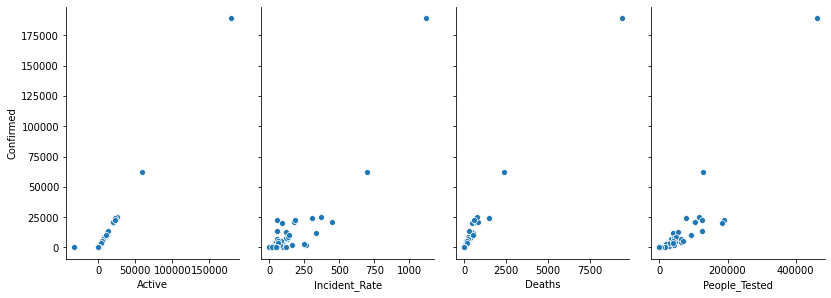

In [198]:
sns.pairplot(apr1, x_vars=['Active', 'Incident_Rate', 'Deaths', 
                           'People_Tested'], 
             y_vars='Confirmed', height=4, aspect=0.7);



    highlights:
        - the lower the mortality rate, the lower the incident_rate (quite obvious)
        - the lower the active cases, the lower the incident_rate
        - the higher the deaths, the greater the incident_rates

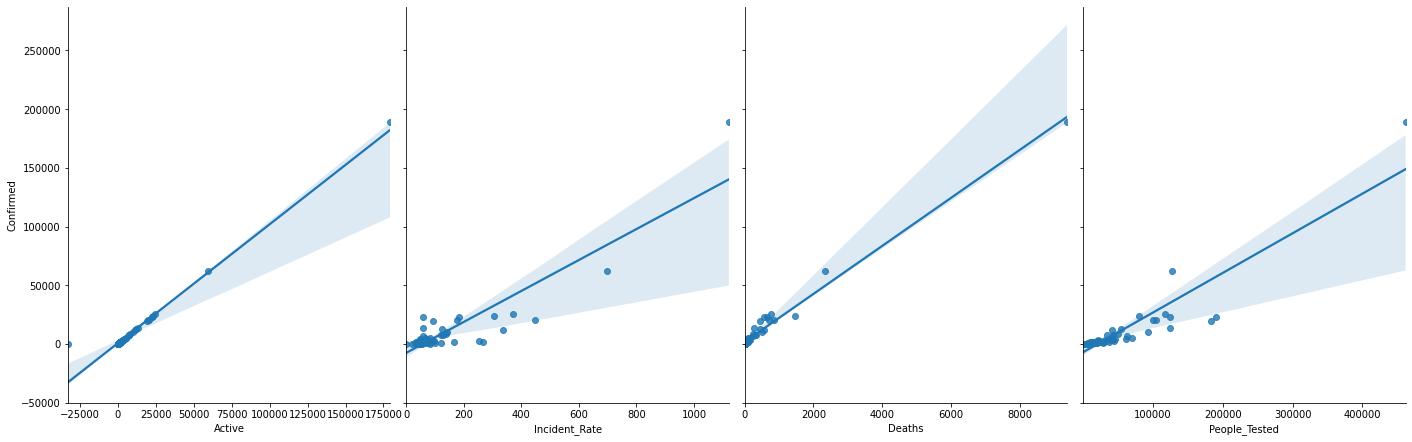

In [201]:
sns.pairplot(apr1, x_vars=['Active', '', 'Deaths', 
                           'People_Tested'], 
             y_vars='Confirmed', height=6, aspect=.8, kind='reg');

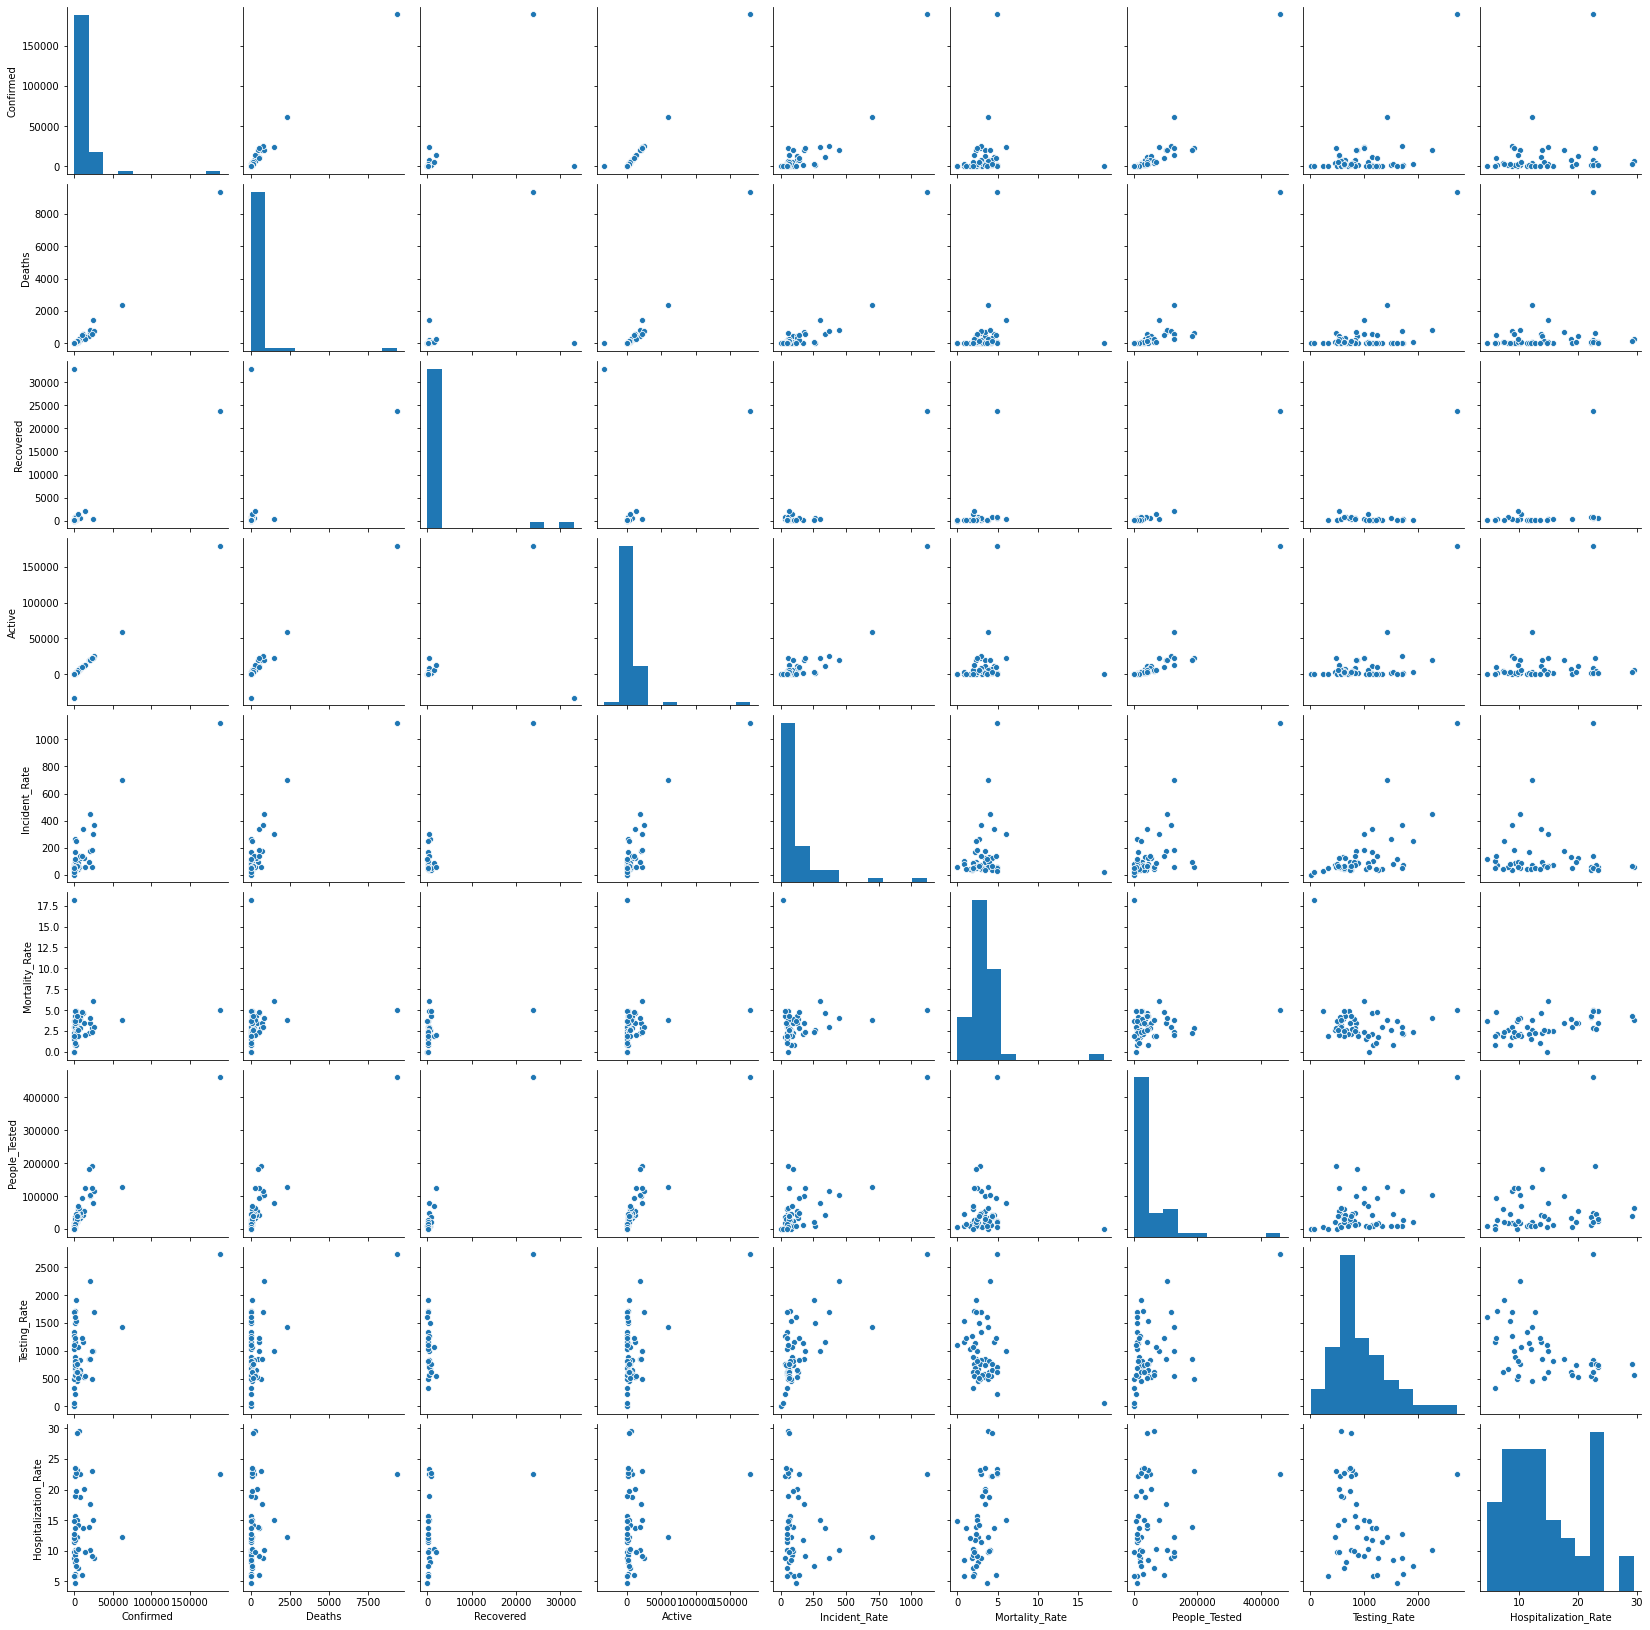

In [192]:
sns.pairplot(apr1)

In [193]:
auto_corr = apr1.corr()
auto_corr

,Confirmed,Deaths,Recovered,Active,Incident_Rate,Mortality_Rate,People_Tested,Testing_Rate,Hospitalization_Rate
Confirmed,1.000000,0.991306,0.550863,0.985345,0.896644,0.122998,0.910503,0.510753,0.167469
Deaths,0.991306,1.000000,0.550580,0.974489,0.882530,0.141672,0.871627,0.511333,0.180164
Recovered,0.550863,0.550580,1.000000,0.392786,0.931017,0.327445,0.971482,0.592729,0.346958
Active,0.985345,0.974489,0.392786,1.000000,0.896949,0.121988,0.912066,0.510486,0.166742
Incident_Rate,0.896644,0.882530,0.931017,0.896949,1.000000,0.098944,0.759640,0.672617,0.023158
Mortality_Rate,0.122998,0.141672,0.327445,0.121988,0.098944,1.000000,0.044500,-0.231259,0.447286
People_Tested,0.910503,0.871627,0.971482,0.912066,0.759640,0.044500,1.000000,0.443345,0.181944
Testing_Rate,0.510753,0.511333,0.592729,0.510486,0.672617,-0.231259,0.443345,1.000000,-0.301916
Hospitalization_Rate,0.167469,0.180164,0.346958,0.166742,0.023158,0.447286,0.181944,-0.301916,1.000000


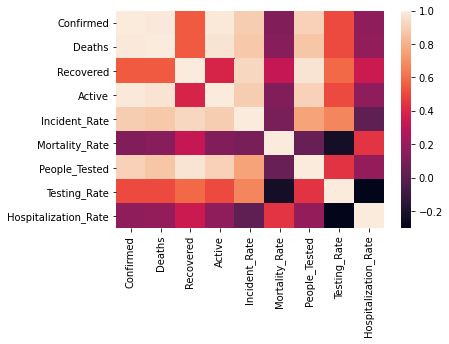

In [194]:
sns.heatmap(auto_corr)

    Perhaps mapping out the relationship between variable change rates/diff over time and incidence rate may be appropriate
    pandas: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html#pandas.DataFrame.diff
    
##### adding onto important variables (based on the coef) ML options:
1. ** <br>
    Main X vars: ['Confirmed','Deaths','Active','People_Tested','Testing_Rate']
    <br>
    y = 'Incident_Rate'
    - People_Tested is rather significant more than Testing_Rate.
    - Hospitalization rate is not significanlty correlated to confirmed nor incident rates.
2.  <br>
    Main X vars: ['Deaths','Active','Incident_Rate','People_Tested'] (pct_change eachday)
    <br>
    y = likely to yield high-risk confirmed numbers ('Confirmed' pct_change is significantly above expected avg pct_change for next week)?
    - coef between 'Confirmed' and each of these variables are more robust than the first option.

# purpose: mask-forecast (like weather forecast)
1. linear regression: get RME/line of best fit, if a data point is significantly deviant from mean/has significant mean error, classify as True for mask-warning for that week.
 
    to do that, we'd have to look at how (which variables?) interact and result following 
    week's rise/decrease in (either active or incident_rate)
    
    

In [5]:
# get next date and compare the numbers 
apr13 = pd.read_csv('04-13-2020.csv', 
                    sep=',')
apr2 = apr13[['Province_State', 
                          'Country_Region', 
                          'Last_Update', 
                          'Confirmed', 
                          'Deaths', 
                          'Recovered', 
                          'Active', 
                          'Incident_Rate',
                          'People_Tested']]
apr2.head()


,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested
0,Alabama,US,2020-04-13 23:07:54,3734,99,NaN,3635.0,79.634933,29182.0
1,Alaska,US,2020-04-13 23:07:54,277,8,85.0,269.0,46.340521,7830.0
2,American Samoa,US,NaN,0,0,NaN,NaN,0.000000,3.0
3,Arizona,US,2020-04-13 23:07:54,3705,122,NaN,3583.0,50.901828,43347.0
4,Arkansas,US,2020-04-13 23:07:54,1410,29,391.0,1381.0,54.460614,20804.0


In [6]:
apr1.sort_values(by='Confirmed', ascending=False)


,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested
35,New York,US,2020-04-12 23:18:15,189033,9385,23887.0,179648,1121.124012,461601.0
33,New Jersey,US,2020-04-12 23:18:15,61850,2350,NaN,59500,696.337277,126735.0
24,Massachusetts,US,2020-04-12 23:18:15,25475,756,NaN,24719,371.151606,116730.0
25,Michigan,US,2020-04-12 23:18:15,24244,1479,433.0,22765,304.295367,79437.0
41,Pennsylvania,US,2020-04-12 23:18:15,22938,557,NaN,22381,182.228445,124890.0
4,California,US,2020-04-12 23:18:15,22795,640,NaN,22155,58.137726,190328.0
16,Illinois,US,2020-04-12 23:18:15,20852,720,NaN,20132,177.680782,100735.0
21,Louisiana,US,2020-04-12 23:18:15,20595,840,NaN,19755,447.983649,104045.0
10,Florida,US,2020-04-12 23:18:15,19895,461,NaN,19434,93.700227,182753.0
47,Texas,US,2020-04-12 23:18:15,13677,283,2014.0,13394,59.505161,124533.0


In [7]:
apr2.sort_values(by='Confirmed', ascending=False)

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested
36,New York,US,2020-04-13 23:07:54,195749,10058,23887.0,185691.0,1160.955517,478357.0
34,New Jersey,US,2020-04-13 23:07:54,64584,2443,NaN,62141.0,727.117974,129469.0
25,Massachusetts,US,2020-04-13 23:07:54,26867,844,NaN,26023.0,391.432000,122049.0
26,Michigan,US,2020-04-13 23:07:54,25635,1602,447.0,24033.0,321.754320,82644.0
43,Pennsylvania,US,2020-04-13 23:07:54,24292,589,NaN,23703.0,192.985150,129792.0
5,California,US,2020-04-13 23:07:54,23931,714,NaN,23217.0,61.035048,190882.0
17,Illinois,US,2020-04-13 23:07:54,22025,798,NaN,21227.0,187.675965,105768.0
11,Florida,US,2020-04-14 00:42:00,21019,499,NaN,122520.0,579.387193,196207.0
22,Louisiana,US,2020-04-13 23:07:54,21016,884,NaN,20132.0,457.141266,108091.0
49,Texas,US,2020-04-13 23:07:54,14275,305,2269.0,13970.0,62.106907,133226.0


In [110]:
apr2[apr2['Province_State']=='Recovered']

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested
58,Recovered,US,NaN,0,0,43482.0,-43482.0,NaN,NaN


### 7 day rolling mean of incident_rate change
    Would have to create a new column for daily change rate of incident rate
    
    1. read each day data
    2. each row will be states
    3. each columns will be dates and values will be incident_rate change

In [11]:
filename_ex = '04-20-2020.csv'
keyname_ex = filename_ex[0:-4]
print(keyname_ex)

04-20-2020


In [81]:
recent = pd.read_csv('07-20-2020.csv', sep=',')
latest_states = recent['Province_State']
len(latest_states)
apr2_states = apr2['Province_State'].values
apr2['Province_State'][0]

dict_ex = {}

dict_ex['a'] = {'date_1': 1}
dict_ex['a']['date_2'] = 2
dict_ex['b'] = {'date_1': 3}
dict_ex['b']['date_2'] = 4

df_ex = pd.DataFrame(dict_ex)
df_ex_t = df_ex.T
df_ex_t


,date_1,date_2
a,1,2
b,3,4


In [207]:
apr1.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'Mortality_Rate',
       'People_Tested', 'Testing_Rate', 'Hospitalization_Rate',
       'recovery_rate'],
      dtype='object')

#  Simple Linear Regression
    First, look at slr using 'Incident_Rate' as y and 'Confirmed' as X
   

In [ ]:
# create X and y
simple_feat = 

# Multiple Linear Regression
    Compare the R^2 val with s_linreg
target (y) : 'Confirmed' ›› binary classification 
    - if Confirmed is significantly greater than mean (either daily or 7-day rolling mean; haven't determined which is better presentation)
    
factors (x_vars) : ['Death','Active','Confirmed','People_Tested','Testing_Rate']

##### Reading in data for each date (04-12-2020 - 07-20-2020), extracting & creating new
    1. Iterating through csv files, read in as df
        - groupby date then state
        - select only columns:
            ['incident_rate', 'confirmed', 'deaths', 'active', 'num_tested', 'testing_rate']
             
             'num_tested' == 'People_Tested'
        
        - concat each df to previous                       

    2. 

In [208]:
import os

#datetime_cols = []
csv_list = []
# append csv file names into an empty list to be iterated through afterwards
for files in sorted(os.listdir(".")):
    if files.endswith(".csv"):
        csv_list.append(files)
        

print(len(csv_list))
csv_list[:5]


100


['04-12-2020.csv',
 '04-13-2020.csv',
 '04-14-2020.csv',
 '04-15-2020.csv',
 '04-16-2020.csv']

In [222]:
df1_ex = pd.read_csv(csv_list[0],sep=',')
#df1_ex.head()
#filtered_cols = ['Province_State', 'Confirmed', 'Deaths', 'Active', 'People_Tested', 'Testing_Rate', 'Incident_Rate']
df1_ex_filter = df1_ex[['Province_State','Confirmed', 'Deaths', 'Active', 
           'People_Tested', 'Testing_Rate', 'Incident_Rate']]

df1_ex_filter.set_index(keys='Province_State', drop=True, inplace=True)
                              


,Confirmed,Deaths,Active,People_Tested,Testing_Rate,Incident_Rate
Province_State,,,,,,
Alabama,3563,93,3470,21583.0,460.300152,75.988020
Alaska,272,8,264,8038.0,1344.711576,45.504049
Arizona,3542,115,3427,42109.0,578.522286,48.662422
Arkansas,1280,27,1253,19722.0,761.753354,49.439423
California,22795,640,22155,190328.0,485.423868,58.137726


In [225]:
df1_ex_T = df1_ex_filter.T
df1_ex_T

Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,District of Columbia,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,American Samoa,Northern Mariana Islands,Recovered,Virgin Islands
Confirmed,3563.000000,272.000000,3542.000000,1280.000000,22795.000000,7307.000000,12035.000000,1625.000000,49.0,1875.000000,...,727.000000,5274.000000,10609.000000,593.000000,3341.000000,270.000000,0.000000,11.000000,0.0,51.000000
Deaths,93.000000,8.000000,115.000000,27.000000,640.000000,289.000000,554.000000,35.000000,0.0,50.000000,...,27.000000,141.000000,506.000000,6.000000,144.000000,0.000000,0.000000,2.000000,0.0,1.000000
Active,3470.000000,264.000000,3427.000000,1253.000000,22155.000000,7018.000000,11481.000000,1590.000000,49.0,1825.000000,...,700.000000,5133.000000,10103.000000,587.000000,3197.000000,270.000000,0.000000,9.000000,-32988.0,50.000000
People_Tested,21583.000000,8038.000000,42109.000000,19722.000000,190328.000000,34873.000000,41220.000000,11103.000000,NaN,10640.000000,...,9841.000000,39985.000000,93615.000000,16257.000000,39257.000000,5459.000000,3.000000,38.000000,NaN,350.000000
Testing_Rate,460.300152,1344.711576,578.522286,761.753354,485.423868,615.389991,1156.148159,1140.214672,NaN,1507.618148,...,1611.717172,505.676450,1240.031828,1228.800044,758.652263,1097.860188,5.391708,68.910489,NaN,326.285565
Incident_Rate,75.988020,45.504049,48.662422,49.439423,58.137726,128.943729,337.560483,166.878217,NaN,265.675190,...,119.064972,66.698452,140.527668,44.822441,64.565739,54.299735,0.000000,19.947773,NaN,47.544468


In [226]:
# iterate through csv_list and read_csv > set state names as dict keys > dates will be column names >
    # groupby the df with multi-idx: state names then features > set the df col name as datetimeindex > set dict
        #value with the df
feature_list = ['Province_State', 'Confirmed', 'Deaths', 'Active', 
                'People_Tested', 'Testing_Rate', 'Incident_Rate']
 
#datetime_idx = pd.DatetimeIndex([filename[0:-4] for filename in csv_list])
daily_states_dict = {}

for i in range(len(csv_list)):
    csv_str = csv_list[i]
    today_df = pd.read_csv(csv_str, sep=',')
    filter_df = today_df[feature_list]
    filter_df.set_index(keys='Province_State', drop=True, inplace=True)
    today_T = filter_df.T
    daily_states_dict[csv_str[0:-4]] = today_T
    
print(len(df1_bydate_state))

59


# STOPPED HERE: iterate through each date keys to create daily df, then to concat by axis=0 across the dfs?

In [227]:
for date_key, dfs in daily_states_dict:
    dates_df = pd.DataFrame

KeyError: 0

In [85]:
#daily_dict['04-13-2020'] 
#printed out index from 0-end of Incident_Rate for this date.

#now, convert the dictionary into df
ts = pd.DataFrame(daily_dict)
tstp = ts.T
tstp.columns = pd.DatetimeIndex(tstp.columns)
print(type(tstp.columns))
tstp.head()

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20
Alabama,75.988020,79.634933,84.305541,86.907433,92.665716,97.485613,100.492717,104.246265,108.319718,113.395538,...,1059.454212,1092.901859,1132.835086,1167.710376,1204.665947,1245.884053,1286.735051,1330.441336,1366.683085,1405.025509
Alaska,45.504049,46.340521,47.678875,49.017230,50.188290,51.693938,52.530410,53.366881,53.701470,55.039824,...,189.325332,202.174849,210.376669,215.844548,222.952792,231.428005,237.032582,245.507795,256.306857,266.559132
Arizona,48.662422,50.901828,52.330651,54.460147,58.210808,61.975208,64.901548,67.772933,69.627656,72.210528,...,1647.680491,1682.535535,1701.178930,1759.884331,1804.631228,1849.405603,1903.123861,1940.795335,1973.204893,1994.623503
Arkansas,49.439423,54.460614,57.859574,60.601917,62.571769,65.468610,67.361213,68.790322,76.206235,76.862852,...,923.320401,939.988150,958.942330,987.870650,1003.941939,1031.014605,1052.487173,1078.035552,1101.065543,1124.228081
California,58.137726,61.035048,64.669453,68.061564,70.589069,74.363750,77.766063,80.163495,85.914781,90.452049,...,806.740233,821.373680,843.680701,876.212406,898.165107,923.020707,944.667173,963.613209,979.205852,1006.954228


In [109]:
tstp.tail()

,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20
Wyoming,54.299735,55.305285,56.713056,57.718607,59.528598,61.338589,62.143030,62.947470,63.751911,89.091787,...,317.748838,321.722859,328.806982,336.927806,342.975228,350.059351,357.489041,364.227597,367.337700,377.877493
American Samoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Northern Mariana Islands,19.947773,19.947773,19.947773,23.574641,23.574641,23.574641,25.388075,25.388075,25.388075,25.388075,...,59.843319,59.843319,59.843319,65.283621,65.283621,67.097055,67.097055,67.097055,67.097055,68.910489
Recovered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Virgin Islands,47.544468,47.544468,47.544468,47.544468,47.544468,47.544468,49.408957,49.408957,49.408957,49.408957,...,155.684827,168.736249,192.042361,192.042361,226.535407,232.128873,245.180296,263.825186,263.825186,283.402319


In [101]:
# check for nulls
print(f'tsdf size: {tstp.size}', '\n')
for idx in range(len(tstp)):
    if tstp.iloc[idx,:].isnull().sum() > 0:
        print("null in row: ", idx)

        

tsdf size: 5900 

null in row:  8
null in row:  12
null in row:  57


In [111]:
print(tstp.index[8], tstp.iloc[8,:].isnull().sum())
print(tstp.index[12], tstp.iloc[12,:].isnull().sum())
print(tstp.index[57], tstp.iloc[57,:].isnull().sum())



Diamond Princess 100
Grand Princess 100
Recovered 100


In [122]:
#drop all three rows with all null values. No other rows have nulls.
#tstp_ = tstp.dropna(axis=0, how='all')
#tstp_.isnull().sum().sum()
tstp.dropna(axis=0, how='all', inplace=True)
len(tstp)

56

    After deleting rows with all NaNs, there are 56 states left.
    Diamond & Grand Princess can be considered unusual situations, in which they were not states, but rather cruise-ships. They can be great samples which reflects early covid-19 circumstances, but cruise ship environments cannot be denied as exceptions.
    
    Recovered row is not a state.

### Get daily rate change

In [123]:
ts_pc = tstp.pct_change(axis='columns')
ts_pc

,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20
Alabama,NaN,4.799326e-02,5.865024e-02,3.086264e-02,0.066258,0.052014,0.030847,0.037351,0.039075,0.046860,...,0.028491,0.031571,0.036539,0.030786,0.031648,0.034215,0.032789,0.033967,0.027240,0.028055
Alaska,NaN,1.838235e-02,2.888087e-02,2.807018e-02,0.023891,0.030000,0.016181,0.015924,0.006270,0.024922,...,0.046863,0.067870,0.040568,0.025991,0.032932,0.038013,0.024217,0.035755,0.043987,0.040000
Arizona,NaN,4.601920e-02,2.807018e-02,4.069310e-02,0.068870,0.064668,0.047218,0.044242,0.027367,0.037096,...,0.025990,0.021154,0.011081,0.034509,0.025426,0.024811,0.029046,0.019795,0.016699,0.010855
Arkansas,NaN,1.015625e-01,6.241135e-02,4.739653e-02,0.032505,0.046296,0.028909,0.021216,0.107805,0.008616,...,0.039585,0.018052,0.020164,0.030167,0.016269,0.026966,0.020827,0.024274,0.021363,0.021036
California,NaN,4.983549e-02,5.954620e-02,5.245307e-02,0.037136,0.053474,0.045752,0.030829,0.071744,0.052811,...,0.025334,0.018139,0.027158,0.038559,0.025054,0.027674,0.023452,0.020056,0.016181,0.028338
Colorado,NaN,5.255235e-02,3.367573e-02,7.547159e-04,0.041478,0.048878,0.040962,0.075495,0.000000,0.076362,...,0.011058,0.008804,0.008755,0.012091,0.012451,0.014972,0.015966,0.011290,0.008901,0.010567
Connecticut,NaN,1.118405e-01,4.543756e-02,5.475731e-02,0.076516,0.058235,0.044084,0.023476,0.103162,0.027504,...,0.000000,0.000000,0.004716,0.000421,0.002230,0.002393,0.002995,0.000000,0.000000,0.003383
Delaware,NaN,8.184615e-02,9.556314e-02,4.569055e-02,0.027805,0.119324,0.095382,0.000000,0.081560,0.067760,...,0.007193,0.004787,0.005858,0.006988,0.006246,0.004904,0.017005,0.006898,0.006702,0.007767
District of Columbia,NaN,4.266667e-02,5.268542e-02,6.754130e-02,0.069640,0.053617,0.076737,0.047637,0.047977,0.058422,...,0.005399,0.004259,0.005439,0.003668,0.007309,0.004535,0.003521,0.007108,0.005985,0.006927
Florida,NaN,5.183413e+00,-8.241898e-01,4.082671e-02,0.036960,0.060661,0.029605,0.032245,0.028312,0.029935,...,0.042433,0.060115,0.046788,0.032553,0.034911,0.046271,0.036311,0.031561,0.036964,0.029559


In [127]:
#drop American Samoa, since there are no incident rate changes
ts_pc.dropna(axis=0, how='all', inplace=True)
ts_pc

,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20
Alabama,NaN,4.799326e-02,5.865024e-02,3.086264e-02,0.066258,0.052014,0.030847,0.037351,0.039075,0.046860,...,0.028491,0.031571,0.036539,0.030786,0.031648,0.034215,0.032789,0.033967,0.027240,0.028055
Alaska,NaN,1.838235e-02,2.888087e-02,2.807018e-02,0.023891,0.030000,0.016181,0.015924,0.006270,0.024922,...,0.046863,0.067870,0.040568,0.025991,0.032932,0.038013,0.024217,0.035755,0.043987,0.040000
Arizona,NaN,4.601920e-02,2.807018e-02,4.069310e-02,0.068870,0.064668,0.047218,0.044242,0.027367,0.037096,...,0.025990,0.021154,0.011081,0.034509,0.025426,0.024811,0.029046,0.019795,0.016699,0.010855
Arkansas,NaN,1.015625e-01,6.241135e-02,4.739653e-02,0.032505,0.046296,0.028909,0.021216,0.107805,0.008616,...,0.039585,0.018052,0.020164,0.030167,0.016269,0.026966,0.020827,0.024274,0.021363,0.021036
California,NaN,4.983549e-02,5.954620e-02,5.245307e-02,0.037136,0.053474,0.045752,0.030829,0.071744,0.052811,...,0.025334,0.018139,0.027158,0.038559,0.025054,0.027674,0.023452,0.020056,0.016181,0.028338
Colorado,NaN,5.255235e-02,3.367573e-02,7.547159e-04,0.041478,0.048878,0.040962,0.075495,0.000000,0.076362,...,0.011058,0.008804,0.008755,0.012091,0.012451,0.014972,0.015966,0.011290,0.008901,0.010567
Connecticut,NaN,1.118405e-01,4.543756e-02,5.475731e-02,0.076516,0.058235,0.044084,0.023476,0.103162,0.027504,...,0.000000,0.000000,0.004716,0.000421,0.002230,0.002393,0.002995,0.000000,0.000000,0.003383
Delaware,NaN,8.184615e-02,9.556314e-02,4.569055e-02,0.027805,0.119324,0.095382,0.000000,0.081560,0.067760,...,0.007193,0.004787,0.005858,0.006988,0.006246,0.004904,0.017005,0.006898,0.006702,0.007767
District of Columbia,NaN,4.266667e-02,5.268542e-02,6.754130e-02,0.069640,0.053617,0.076737,0.047637,0.047977,0.058422,...,0.005399,0.004259,0.005439,0.003668,0.007309,0.004535,0.003521,0.007108,0.005985,0.006927
Florida,NaN,5.183413e+00,-8.241898e-01,4.082671e-02,0.036960,0.060661,0.029605,0.032245,0.028312,0.029935,...,0.042433,0.060115,0.046788,0.032553,0.034911,0.046271,0.036311,0.031561,0.036964,0.029559


In [128]:
#drop first column to compute means for pct change
ts_pc.dropna(axis=1, how='all', inplace=True)
ts_pc

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
         2020-04-13  2020-04-14    2020-04-15  2020-04-16  2020-04-17  \
count  5.500000e+01   55.000000  5.500000e+01   55.000000   55.000000   
mean   1.385364e-01    0.030344  4.937130e-02    0.048648    0.054884   
std    6.937040e-01    0.123698  4.441949e-02    0.029449    0.037828   
min   -1.240166e-10   -0.824190  2.684808e-11    0.000000   -0.017569   
25%    1.948019e-02    0.024671  2.234596e-02    0.027517    0.030639   
50%    4.420372e-02    0.045651  4.569055e-02    0.046395    0.048878   
75%    5.846077e-02    0.055555  5.848803e-02    0.073493    0.071827   
max    5.183413e+00    0.219887  2.353579e-01    0.122432    0.183621   

       2020-04-18  2020-04-19  2020-04-20  2020-04-21  2020-04-22  ...  \
count   55.000000   55.000000   55.000000   55.000000   55.000000  ...   
mean     0.054526    0.045949    0.038409    0.041799    0.039824  ...   
std      0.050432    0.037983    0.031759    0.055600    0.032826 

,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,...,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20
Alabama,4.799326e-02,5.865024e-02,3.086264e-02,0.066258,0.052014,0.030847,0.037351,0.039075,0.046860,0.051909,...,0.028491,0.031571,0.036539,0.030786,0.031648,0.034215,0.032789,0.033967,0.027240,0.028055
Alaska,1.838235e-02,2.888087e-02,2.807018e-02,0.023891,0.030000,0.016181,0.015924,0.006270,0.024922,0.018237,...,0.046863,0.067870,0.040568,0.025991,0.032932,0.038013,0.024217,0.035755,0.043987,0.040000
Arizona,4.601920e-02,2.807018e-02,4.069310e-02,0.068870,0.064668,0.047218,0.044242,0.027367,0.037096,0.041286,...,0.025990,0.021154,0.011081,0.034509,0.025426,0.024811,0.029046,0.019795,0.016699,0.010855
Arkansas,1.015625e-01,6.241135e-02,4.739653e-02,0.032505,0.046296,0.028909,0.021216,0.107805,0.008616,0.143719,...,0.039585,0.018052,0.020164,0.030167,0.016269,0.026966,0.020827,0.024274,0.021363,0.021036
California,4.983549e-02,5.954620e-02,5.245307e-02,0.037136,0.053474,0.045752,0.030829,0.071744,0.052811,0.052982,...,0.025334,0.018139,0.027158,0.038559,0.025054,0.027674,0.023452,0.020056,0.016181,0.028338
Colorado,5.255235e-02,3.367573e-02,7.547159e-04,0.041478,0.048878,0.040962,0.075495,0.000000,0.076362,0.039912,...,0.011058,0.008804,0.008755,0.012091,0.012451,0.014972,0.015966,0.011290,0.008901,0.010567
Connecticut,1.118405e-01,4.543756e-02,5.475731e-02,0.076516,0.058235,0.044084,0.023476,0.103162,0.027504,0.103585,...,0.000000,0.000000,0.004716,0.000421,0.002230,0.002393,0.002995,0.000000,0.000000,0.003383
Delaware,8.184615e-02,9.556314e-02,4.569055e-02,0.027805,0.119324,0.095382,0.000000,0.081560,0.067760,0.091778,...,0.007193,0.004787,0.005858,0.006988,0.006246,0.004904,0.017005,0.006898,0.006702,0.007767
District of Columbia,4.266667e-02,5.268542e-02,6.754130e-02,0.069640,0.053617,0.076737,0.047637,0.047977,0.058422,0.034861,...,0.005399,0.004259,0.005439,0.003668,0.007309,0.004535,0.003521,0.007108,0.005985,0.006927
Florida,5.183413e+00,-8.241898e-01,4.082671e-02,0.036960,0.060661,0.029605,0.032245,0.028312,0.029935,0.015788,...,0.042433,0.060115,0.046788,0.032553,0.034911,0.046271,0.036311,0.031561,0.036964,0.029559


In [131]:
# before getting the 7 day rolling mean and sem, evaluate overall mean & sem
tstp_pc = ts_pc.T
tstp_pc.iloc[0,:]
#tstp_pc['daily_mean_all'] = [tstp_pc[i].map

Alabama                     4.799326e-02
Alaska                      1.838235e-02
Arizona                     4.601920e-02
Arkansas                    1.015625e-01
California                  4.983549e-02
Colorado                    5.255235e-02
Connecticut                 1.118405e-01
Delaware                    8.184615e-02
District of Columbia        4.266667e-02
Florida                     5.183413e+00
Georgia                     6.930614e-02
Guam                       -3.662404e-12
Hawaii                      1.002004e-02
Idaho                       1.350391e-02
Illinois                    5.625360e-02
Indiana                     5.436428e-02
Iowa                        7.750473e-02
Kansas                      3.422619e-02
Kentucky                    2.801834e-02
Louisiana                   2.044185e-02
Maine                       1.026856e-01
Maryland                    8.644377e-02
Massachusetts               5.464181e-02
Michigan                    5.737502e-02
Minnesota       

In [51]:
type(ts.columns)

pandas.core.indexes.datetimes.DatetimeIndex

In [53]:
ts.set_index(ts_idx, inplace=True)
ts.head()

,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,...,2020-07-11,2020-07-12,2020-07-13,2020-07-14,2020-07-15,2020-07-16,2020-07-17,2020-07-18,2020-07-19,2020-07-20
Alabama,75.988020,79.634933,84.305541,86.907433,92.665716,97.485613,100.492717,104.246265,108.319718,113.395538,...,1059.454212,1092.901859,1132.835086,1167.710376,1204.665947,1245.884053,1286.735051,1330.441336,1366.683085,1405.025509
Alaska,45.504049,46.340521,47.678875,49.017230,50.188290,51.693938,52.530410,53.366881,53.701470,55.039824,...,189.325332,202.174849,210.376669,215.844548,222.952792,231.428005,237.032582,245.507795,256.306857,266.559132
Arizona,48.662422,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Arkansas,49.439423,50.901828,52.330651,54.460147,58.210808,61.975208,64.901548,67.772933,69.627656,72.210528,...,1647.680491,1682.535535,1701.178930,1759.884331,1804.631228,1849.405603,1903.123861,1940.795335,1973.204893,1994.623503
California,58.137726,54.460614,57.859574,60.601917,62.571769,65.468610,67.361213,68.790322,76.206235,76.862852,...,923.320401,939.988150,958.942330,987.870650,1003.941939,1031.014605,1052.487173,1078.035552,1101.065543,1124.228081
